In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Uber driver data

This dataset contains 3 months of trips of an Uber driver. The driver works in San Francisco and around the Bay Area.

In [2]:
df = pd.read_csv('sample_sf_user_trip.csv', parse_dates=['pickup_time', 'dropoff_time'])

Let's check if the driver traveled in the same time zone or area by checking the lat and lon.


In [3]:
print('min lat {}, max lat {}, min lon {}, max lon {}'.format(min(df.pickup_latitude), max(df.pickup_latitude), min(df.pickup_longitude), max(df.pickup_longitude)))

min lat 37.304916051300005, max lat 37.9050444346, min lon -122.51110794, max lon -121.93040415700001


So yes, the driver in this dataset drove within 50 miles, so same timezone. Since timezone is the same, we can just transform the time accordingly. Let's add a sec_of_day column since the duration is already in seconds. Also add a weekday column since weekend and weekdays might be very different. 

In [4]:
import datetime
sec_of_day = df.pickup_time.apply(lambda x: 60**2*x.time().hour + 60*x.time().minute + x.time().second)
hr_of_day = df.pickup_time.apply(lambda x: x.time().hour)
weekday = df.pickup_time.apply(lambda x: x.weekday())
df.insert(1, 'sec_of_day', sec_of_day, True) # 86400 seconds in a day
df.insert(2, 'weekday', weekday, True) # 0 to 6
df.insert(3, 'hr_of_day', hr_of_day, True)
df.head(10)
#df.drop(columns = 'sec_of_day',inplace=True)
#df.drop(columns = 'hr_of_day',inplace=True)
#df.drop(columns = 'weekday',inplace=True)
#df.weekday.values
#df.pickup_time.map(lambda x: x.strptime(x.time,"%Y-%m-%d %H:%M:%S-"))#.map(lambda x: x[10:-5]) # the duration is in seconds

,user_id,sec_of_day,weekday,hr_of_day,pickup_time,pickup_latitude,pickup_longitude,dropoff_time,dropoff_latitude,dropoff_longitude,fare,surge_multiplier,distance,duration,payment,breakdown_toll,breakdown_commission,breakdown_other
0,44898,30588,2,8,2017-03-08 08:29:48-08:00,37.745289,-122.440407,2017-03-08 08:49:43-08:00,37.776630,-122.424942,12.50,1.0,3.66,1195,17.79,0.0,-4.45,22.24
1,44898,32290,2,8,2017-03-08 08:58:10-08:00,37.781427,-122.432337,2017-03-08 09:18:26-08:00,37.788528,-122.399144,12.51,1.2,2.22,1216,15.14,0.0,-3.78,18.92
2,44898,35300,2,9,2017-03-08 09:48:20-08:00,37.792355,-122.409302,2017-03-08 10:02:44-08:00,37.795754,-122.446166,10.35,1.0,2.55,864,6.48,0.0,-1.62,8.10
3,44898,36482,2,10,2017-03-08 10:08:02-08:00,37.796379,-122.446989,2017-03-08 10:21:43-08:00,37.803171,-122.402654,11.18,1.0,3.15,821,6.90,0.0,-1.73,8.63
4,44898,37698,2,10,2017-03-08 10:28:18-08:00,37.807661,-122.412922,2017-03-08 11:03:23-08:00,37.617960,-122.386336,17.23,1.0,1.70,2106,22.17,0.0,-5.54,27.71
5,44898,40860,2,11,2017-03-08 11:21:00-08:00,37.775173,-122.401336,2017-03-08 11:35:05-08:00,37.797456,-122.402971,11.08,1.0,2.61,844,6.47,0.0,-1.62,8.09
6,44898,42833,2,11,2017-03-08 11:53:53-08:00,37.790560,-122.413189,2017-03-08 12:05:59-08:00,37.774024,-122.398900,7.92,1.0,1.74,726,5.33,0.0,-1.33,6.66
7,44898,32414,4,9,2017-03-10 09:00:14-08:00,37.752521,-122.425156,2017-03-10 09:27:32-08:00,37.805169,-122.405279,17.19,1.0,5.12,1638,22.24,0.0,-5.56,27.80
8,44898,34763,4,9,2017-03-10 09:39:23-08:00,37.792264,-122.410906,2017-03-10 09:59:07-08:00,37.757815,-122.390346,12.11,1.0,3.60,1185,8.38,0.0,-2.09,10.47
9,44898,36557,4,10,2017-03-10 10:09:17-08:00,37.776354,-122.397489,2017-03-10 10:13:53-08:00,37.769369,-122.406570,6.60,1.0,1.04,276,4.00,0.0,-1.00,5.00


## Question

Where and when the driver should start a daily driving session to maximize his/her hourly income on any given day of the week? (use the column *payment* as driver's net income per trip)




Where: pickup_lat, pickup_lon
When: pickup_time, 
Interaction between where and when : surge_multiplier

target: payment

Let's check if commission varies a lot between trips

<ipython-input-5-0d16fb6302bd>:2: RuntimeWarning: invalid value encountered in true_divide
  commission_percent = -df.breakdown_commission.values/df.breakdown_other.values * 100


Text(0.5, 1.0, 'Commission percentage for all drivers')

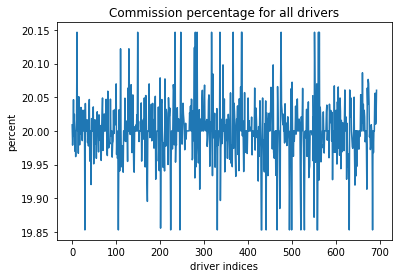

In [5]:
# check commission
commission_percent = -df.breakdown_commission.values/df.breakdown_other.values * 100
plt.plot(commission_percent)
plt.xlabel('driver indices')
plt.ylabel('percent')
plt.title('Commission percentage for all drivers')

In [6]:
# std of commission_percent
np.std(commission_percent[~np.isnan(commission_percent)]) # there's one nan due to division by 0

0.046643931042998736

Commission seems pretty steady at ~20% of the total breakdown, and the standard deviation is merely ~0.05%. Therefore it's reasonable to drop this column.  

Let's see correlations between variables (colinearity), so we can get a sense of variables we need to keep, e.g., if pickup and dropoff locations are correlated/closeby, then we can just use one or the other. 

In [7]:
df.corr()

,user_id,sec_of_day,weekday,hr_of_day,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,fare,surge_multiplier,distance,duration,payment,breakdown_toll,breakdown_commission,breakdown_other
user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sec_of_day,NaN,1.000000,-0.076332,0.998094,0.075911,-0.028056,0.121221,-0.132845,-0.020170,-0.079260,-0.063022,-0.015494,-0.057771,-0.029362,0.056421,-0.056384
weekday,NaN,-0.076332,1.000000,-0.076185,-0.015848,-0.054638,-0.065372,-0.025062,0.027446,0.014508,0.099025,0.010673,0.019501,-0.036813,-0.025391,0.025411
hr_of_day,NaN,0.998094,-0.076185,1.000000,0.071250,-0.026590,0.118967,-0.128024,-0.018268,-0.085154,-0.060576,-0.013743,-0.056123,-0.028396,0.054821,-0.054791
pickup_latitude,NaN,0.075911,-0.015848,0.071250,1.000000,-0.459742,0.493752,-0.324746,-0.219649,0.056775,-0.264668,-0.079549,-0.149532,0.027643,0.159988,-0.160065
pickup_longitude,NaN,-0.028056,-0.054638,-0.026590,-0.459742,1.000000,-0.269572,0.483631,0.155544,-0.028242,0.167110,0.017300,0.123475,0.041289,-0.123403,0.123420
dropoff_latitude,NaN,0.121221,-0.065372,0.118967,0.493752,-0.269572,1.000000,-0.459159,-0.523699,0.058517,-0.581371,-0.251660,-0.464611,0.016063,0.487830,-0.487848
dropoff_longitude,NaN,-0.132845,-0.025062,-0.128024,-0.324746,0.483631,-0.459159,1.000000,0.487002,-0.028966,0.524143,0.268020,0.454186,0.245779,-0.441139,0.441159
fare,NaN,-0.020170,0.027446,-0.018268,-0.219649,0.155544,-0.523699,0.487002,1.000000,0.039930,0.856475,0.558527,0.873996,0.335879,-0.867704,0.867680
surge_multiplier,NaN,-0.079260,0.014508,-0.085154,0.056775,-0.028242,0.058517,-0.028966,0.039930,1.000000,-0.063119,0.035574,0.103497,-0.013713,-0.109935,0.110035


The correlation between pickup and dropoff latitudes and longitudes shows weak correlation at ~0.5. The correlation between payment and dropoff locations shows a stronger correlation (~0.5) than payment and pickup locations (~0.13). This can probably be that people are paying certain prices to get to a specific location, and starting from random locations. Interestingly the latitude is negatively correlated to the payment, which might be people travelling south. 

Since hr_of_day intuitively have some kind of relationship (maybe nonlinear) to payment. Therefore let's just make a x-y plot of hour of day vs payment. 


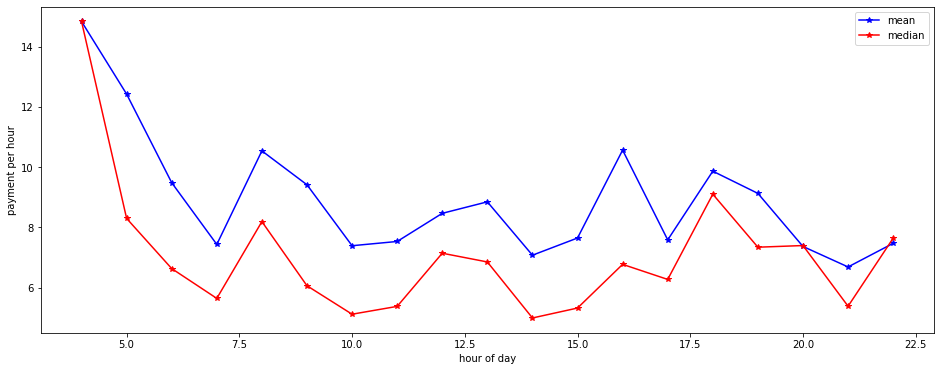

<AxesSubplot:xlabel='hr_of_day', ylabel='payment'>

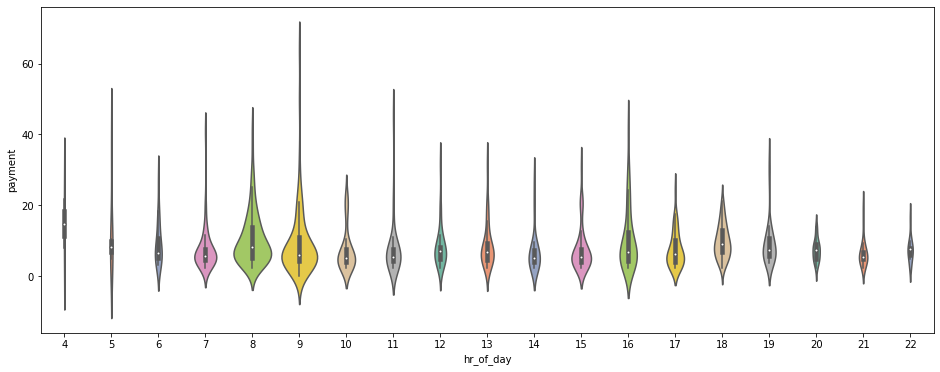

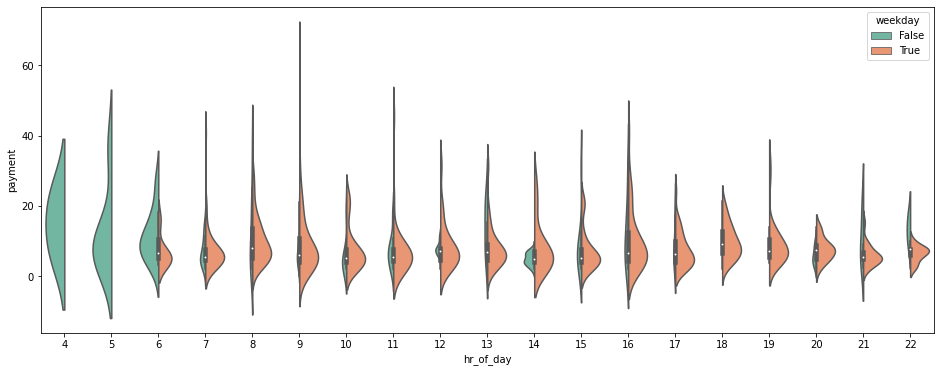

In [8]:
plt.figure(figsize=(16, 6))
plt.plot(df[['payment','hr_of_day']].groupby('hr_of_day').mean(),'b*-')
plt.plot(df[['payment','hr_of_day']].groupby('hr_of_day').median(),'r*-')
plt.ylabel('payment per hour')
plt.xlabel('hour of day')
plt.legend(['mean','median'])
plt.show()
plt.figure(figsize=(16, 6))
import seaborn as sns
tmp = pd.concat([df[['payment','hr_of_day']], df['weekday']<=4], axis=1)
sns.violinplot(x="hr_of_day", y="payment", 
               data = tmp, palette="Set2", split=True, scale="count")
plt.figure(figsize=(16, 6))
sns.violinplot(x="hr_of_day", y="payment", hue="weekday",
               data = tmp, palette="Set2", split=True, scale="count", scale_hue=True)

At first the mean payment (1st plot) seems to favor midnight (4-6am), but a closer look at the  violinplot (3rd plot) with two hues (weekend, weekday) scaled independently shows that the 3-6am price surge are weekend drives. The violinplot (2nd plot) independent of days shows that the 3-4am drives are miniscule in volume. Therefore 4-6am drives are recommended only during the weekends.

The violinplot (2nd plot) shows that there are much more customers in the morning rush hours (7-9am). The afternoon rush hours (16-18pm) have the similar mean and median but less volumes compared to the morning rush hours. This can be understood by morning needing punctuality to work, but afternoon going home need not (so train might be good enough). Therefore 7-9am and 16-18pm are both good times, but morning is more preferred. 

Next lets look at the spatial distribution of payments

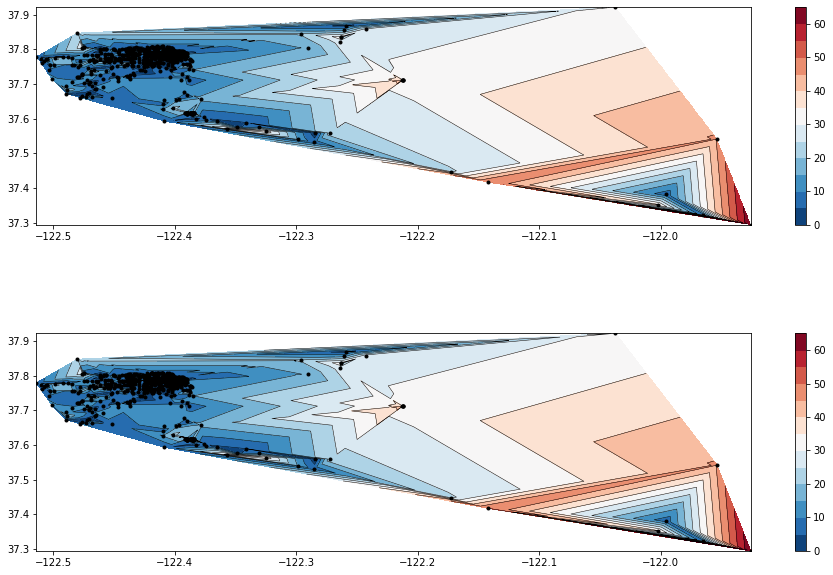

In [9]:
import matplotlib.tri as tri
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,10))

x = df['dropoff_longitude']
y = df['dropoff_latitude']
z = df['payment']
npts = 200
ngridx = 1000
ngridy = 1000

minlon, maxlon = x.min(), x.max()
minlat, maxlat = y.min(), y.max()
xi = np.linspace(minlon, maxlon, ngridx)
yi = np.linspace(minlat, maxlat, ngridy)
# Perform linear interpolation of the data (x,y)
# on a grid defined by (xi,yi)
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)



ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')

cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.figsize=(16, 6)
#ax1.set(xlim=(-2, 2), ylim=(-2, 2))
#ax1.set_title('grid and contour (%d points, %d grid points)' %
#              (npts, ngridx * ngridy))


# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
#ax2.set(xlim=(-2, 2), ylim=(-2, 2))
#ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()
#plt.contour(x, y, df[['pickup_longitude','pickup_latitude','payment']])

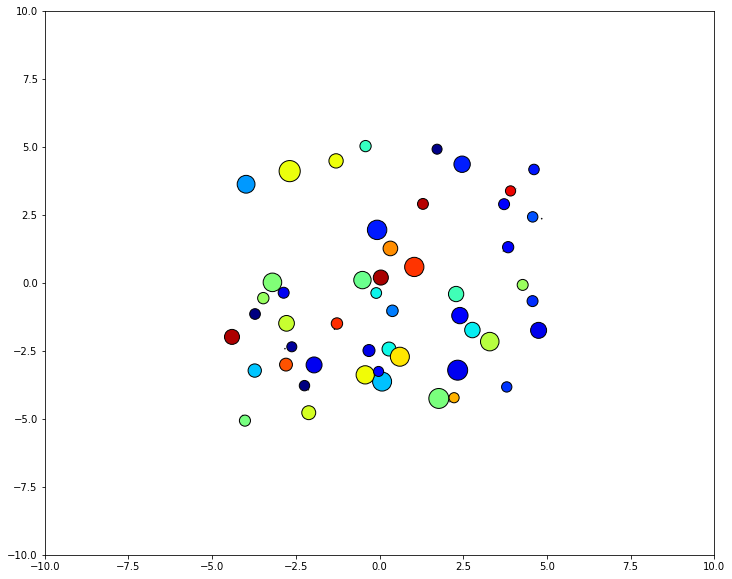

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import numpy as np
from IPython.display import HTML


class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, numpoints=50):
        self.numpoints = numpoints
        self.stream = self.data_stream()

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots(figsize=(12,10))
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
                                          init_func=self.setup_plot, blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y, s, c = next(self.stream).T
        self.scat = self.ax.scatter(x, y, c=c, s=s, vmin=0, vmax=1,
                                    cmap="jet", edgecolor="k")
        self.ax.axis([-10, 10, -10, 10])
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect."""
        xy = (np.random.random((self.numpoints, 2))-0.5)*10
        s, c = np.random.random((self.numpoints, 2)).T
        while True:
            xy += 0.03 * (np.random.random((self.numpoints, 2)) - 0.5)
            s += 0.05 * (np.random.random(self.numpoints) - 0.5)
            c += 0.02 * (np.random.random(self.numpoints) - 0.5)
            yield np.c_[xy[:,0], xy[:,1], s, c]

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)

        # Set x and y data...
        self.scat.set_offsets(data[:, :2])
        # Set sizes...
        self.scat.set_sizes(300 * abs(data[:, 2])**1.5 + 100)
        # Set colors..
        self.scat.set_array(data[:, 3])

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,


if __name__ == '__main__': 
    
    a = AnimatedScatter()
    HTML(a.ani.to_html5_video())
    #rc('animation', html='html5')    
    #plt.show()

In [11]:
%matplotlib inline
a.ani



In [12]:
df['pickup_longitude'].iloc[0]

-122.44040676

TypeError: 'PathCollection' object is not iterable

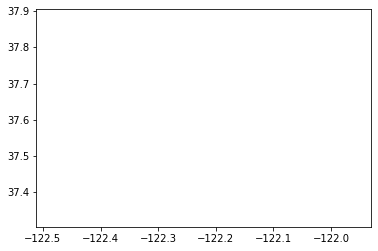

In [13]:
# stop making this animation, too many errors
fig, ax = plt.subplots()
x, y = df['pickup_longitude'], df['pickup_latitude']
minlon, maxlon = x.min(), x.max()
minlat, maxlat = y.min(), y.max()

ax.set_xlim(( minlon, maxlon))
ax.set_ylim(( minlat, maxlat))
scat = ax.scatter(0, 0)
def init():
    scat.set_offsets([0, 0])
    return (scat)
def animate(i):
    #x1, y1 = df['pickup_longitude'], df['pickup_latitude']
    #x2, y2 = df['dropoff_longitude'], df['dropoff_latitude']
    scat.set_offsets(df[['pickup_longitude','pickup_latitude']].iloc[i].values)
    #scat.set_offsets(df[['dropoff_longitude','dropoff_latitude']].iloc[i].values) 
    scat.set_sizes(df['payment'].iloc[i])
    #ax.scatter(df['dropoff_longitude'].iloc[i], df['dropoff_latitude'].iloc[i], s = df['payment'].iloc[i])                          
    return scat
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=20, blit=True)

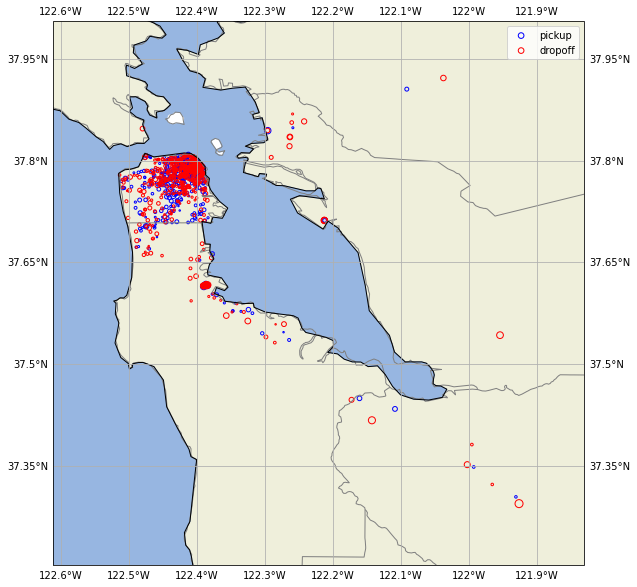

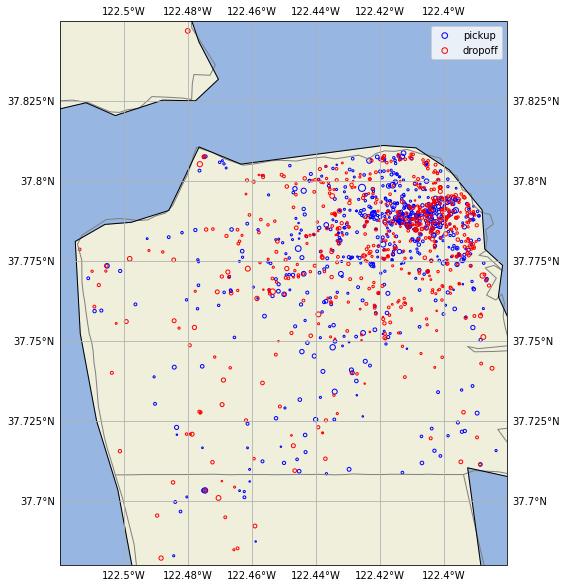

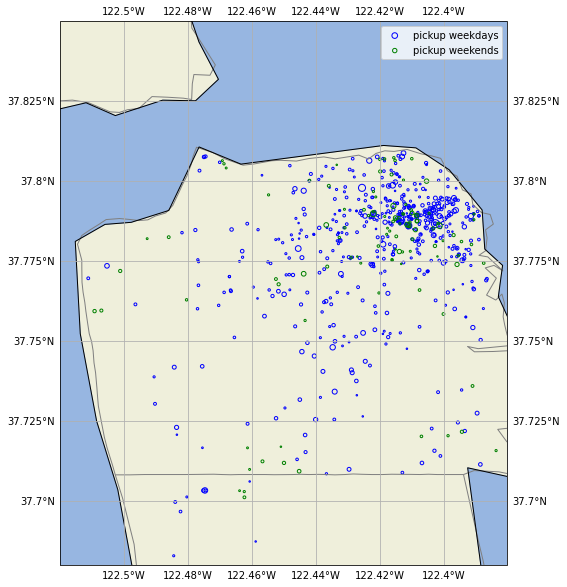

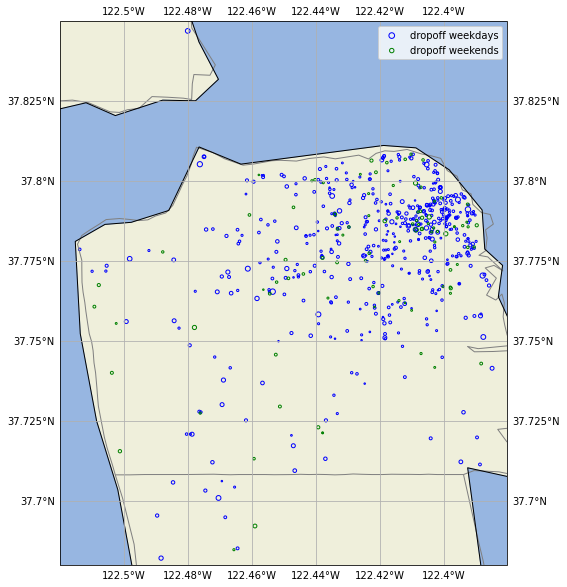

In [105]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker

fig1 = plt.figure(figsize=(10, 10))
extent = (minlon-.1, maxlon+.1, minlat-.1, maxlat+.1)
ax = plt.axes(projection=ccrs.PlateCarree())

reader = shpreader.Reader('countyl010g.shp')

counties = list(reader.geometries())

COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

ax.add_feature(cfeature.LAND.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'))
ax.add_feature(cfeature.LAKES.with_scale('10m'))
ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray')

gl = ax.gridlines(draw_labels=True)
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.set_extent(extent)

x = [df['pickup_longitude'], df['dropoff_longitude']]
y = [df['pickup_latitude'], df['dropoff_latitude']]
s = df['payment'] # the scale of the scatter dots is proportional to the payment

ax.scatter(x[0], y[0], s = s,  color = 'b', facecolors='none')
ax.scatter(x[1], y[1], s = s, color = 'r', facecolors='none')
ax.legend(['pickup','dropoff'])

# Zoom into SF downtown
fig2 = plt.figure(figsize=(10, 10))
extent = (-122.52, -122.38, 37.68, 37.85)
ax = plt.axes(projection=ccrs.PlateCarree())


ax.add_feature(cfeature.LAND.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'))
ax.add_feature(cfeature.LAKES.with_scale('10m'))
ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray')

gl = ax.gridlines(draw_labels=True)
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.set_extent(extent)

ax.scatter(x[0], y[0], s = s,  color = 'b', facecolors='none')
ax.scatter(x[1], y[1], s = s, color = 'r', facecolors='none')
ax.legend(['pickup','dropoff'])

# pickup weekends vs weekdays
weekdays = df['weekday']<=4
weekends = df['weekday']>4
extent = (-122.52, -122.38, 37.68, 37.85)
leg = [['pickup weekdays','pickup weekends'],['dropoff weekdays','dropoff weekends']]
for i in range(2):
    plt.figure(figsize=(16, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND.with_scale('10m'))
    ax.add_feature(cfeature.OCEAN.with_scale('10m'))
    ax.add_feature(cfeature.LAKES.with_scale('10m'))
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray')
    gl = ax.gridlines(draw_labels=True)
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.set_extent(extent)
    ax.scatter(x[i][weekdays], y[i][weekdays], s = s[weekdays],  color = 'b', facecolors='none')
    ax.scatter(x[i][weekends], y[i][weekends], s = s[weekends],  color = 'g', facecolors='none')
    ax.legend(leg[i])
#plt.show()    


There are several reasons to recommend driving in downtown SF:
 - The higher payment red circles south of 37.5N are all from SF downtown (no same size pickup blue circles nearby). 

 - The density of red and blue circles in downtown SF is much higher than the southern counties. 

 - Dropoff red circles have higher counts than pickup blue circles out of downtown SF. That also means that the drivers driving out may not return with a pickup. Therefore, there is a higher chance of picking up in SF downtown going out than that of returning, which worths returning with a empty car. 

Let's zoom into the 37.7N - 37.8N and 122.4W - 122.5W (SF downtown fig 2). We can see that the highest density pickups and dropoffs are all near the northeast quadrant. Therefore, it's highly recommended to drive near this area. 

Let's check the weekend and weekday pickups (fig 3) and dropoffs (fig 4). The pickups and dropoffs are both highest during the weekdays, and seems to all be in close proximity. Therefore staying in the downtown during the weekdays is definitely recommended. 



Text(0.5, 0, 'longitude')

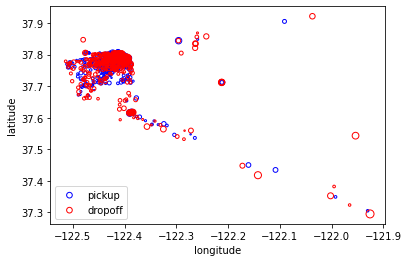

In [27]:
x1, y1 = df['pickup_longitude'], df['pickup_latitude']
x2, y2 = df['dropoff_longitude'], df['dropoff_latitude']
s = df['payment'] # the scale of the scatter dots is proportional to the payment
#plt.figure(figsize=(12,10))
plt.scatter(x1, y1, s = s,  color = 'b', facecolors='none')
plt.scatter(x2, y2, s = s, color = 'r', facecolors='none')
plt.legend(['pickup','dropoff'])
plt.ylabel('latitude')
plt.xlabel('longitude')